In [8]:
##6.1 결정트리##
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]#꽃잎의 길이와 너비
Y = iris.target

#사이킷런은 이진 트리만 만드는 CART알고리즘 사용
tree_clf = DecisionTreeClassifier(max_depth=2) #결정트리의 최대깊이 2, (리프수 3개)
tree_clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='iris_tree.dot', 
                feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

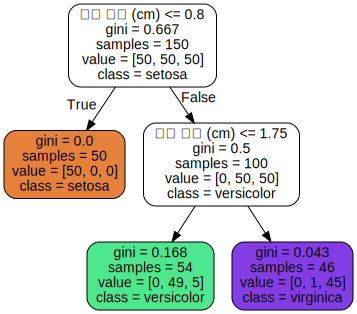

In [10]:
import graphviz

with open("iris_tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./images', cleanup=True)
dot
#gini : 지니 불순도
#sample : 현재 클래스에 속한 샘플의 수

In [12]:
##6.3클래스 확률추정##
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict([[5, 1.5]]) #확률값이 가장 높은 클레스 1 출력

array([1])

In [19]:
##6.8회귀##
from sklearn.tree import DecisionTreeRegressor

# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
Y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, Y)
#클래스 내 샘플의 평균제곱오차가 작아지도록 모델 학습

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0.5, 1.0, 'max_depth=3')

A:\ProgramData\Anaconda3\envs\handsonml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\ProgramData\Anaconda3\envs\handsonml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\ProgramData\Anaconda3\envs\handsonml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44618 missing from current font.
  font.set_text(s, 0, flags=flags)
A:\ProgramData\Anaconda3\envs\handsonml\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)


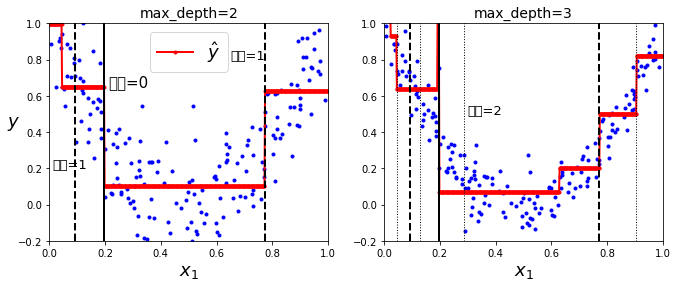

In [20]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, Y)
tree_reg2.fit(X, Y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, Y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "깊이=0", fontsize=15)
plt.text(0.01, 0.2, "깊이=1", fontsize=13)
plt.text(0.65, 0.8, "깊이=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "깊이=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)